<a href="https://colab.research.google.com/github/KenDaupsey/Two-Sample-Tests-in-Python/blob/main/BASIC_TWO_SAMPLE_TESTS_in_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** TWO-SAMPLE TESTS ***

In [1]:
### IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

* Two independent samples t-test *

In [2]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Two-Sample-Tests-in-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(df.head())

    id  female   race     ses  schtyp      prog  read  write  math  science  \
0   70    male  white     low  public   general    57     52    41       47   
1  121  female  white  middle  public  vocation    68     59    53       63   
2   86    male  white    high  public   general    44     33    54       58   
3  141    male  white    high  public  vocation    63     44    47       53   
4  172    male  white  middle  public  academic    47     52    57       53   

   socst  
0     57  
1     61  
2     31  
3     56  
4     61  


In [3]:
### TWO SAMPLE T TEST WITH SCIPY

import scipy.stats as stats
#import pandas as pd

# Assuming df is your DataFrame
# Extract 'write' scores for male and female students
write_male = df[df['female'] == 'male']['write']
write_female = df[df['female'] == 'female']['write']

# Perform a 2-sample t-test
t_statistic, p_value = stats.ttest_ind(write_male, write_female)

# Print the result with p-value as a decimal
print(f"T-statistic: {t_statistic:.4f}, P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("The difference in 'write' scores between male and female students is statistically significant.")
else:
    print("There is no significant difference in 'write' scores between male and female students.")

T-statistic: -3.7341, P-value: 0.0002
The difference in 'write' scores between male and female students is statistically significant.


In [4]:
### TWO SAMPLE T TEST WITH RESEARCHPY foloows below

In [5]:
### Firts, you will have to install the "researchpy" library
!pip install researchpy

In [6]:
# Independent t-test

import researchpy as rp

# If you don't store the 2 returned DataFrames, it outputs as a tuple and
# is displayed
rp.ttest(df['math'], df['write'])

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable      N    Mean        SD        SE  95% Conf.   Interval
 0      math  200.0  52.645  9.368448  0.662449  51.338679  53.951321
 1     write  200.0  52.775  9.478586  0.670237  51.453321  54.096679
 2  combined  400.0  52.710  9.412086  0.470604  51.784826  53.635174,
              Independent t-test   results
 0  Difference (math - write) =    -0.1300
 1         Degrees of freedom =   398.0000
 2                          t =    -0.1380
 3      Two side test p value =     0.8903
 4     Difference < 0 p value =     0.4452
 5     Difference > 0 p value =     0.5548
 6                  Cohen's d =    -0.0138
 7                  Hedge's g =    -0.0138
 8             Glass's delta1 =    -0.0139
 9           Point-Biserial r =    -0.0069)

*Paired Sample T test (With scipy.stats Library)*

In [7]:
#### Import necessary libraries if you are starting from scratch!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [8]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Two-Sample-Tests-in-Python/main/weight_loss_data.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(df.head())

   Before  After
0    77.5   73.9
1    74.3   71.0
2    78.2   75.8
3    82.6   77.7
4    73.8   70.4


Paired t-test: Statistic=57.632133265838675, p-value=0.0000


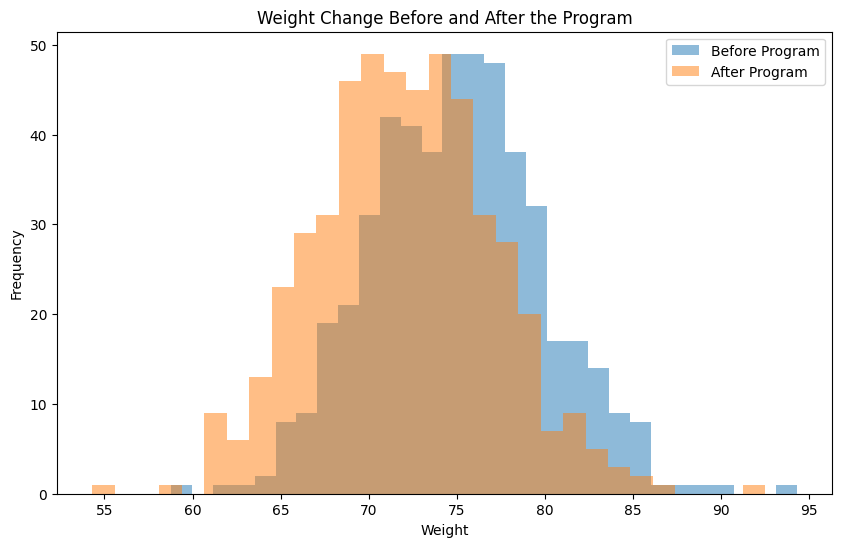

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Assuming df is your DataFrame containing the 'Before' and 'After' columns

# Perform the Paired t-test (parametric equivalence of Wilcoxon Sign Rank Test)
t_stat, t_p_value = ttest_rel(df['Before'], df['After'])
print(f'Paired t-test: Statistic={t_stat}, p-value={t_p_value:.4f}')

# Plot the weight change distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Before'], alpha=0.5, label='Before Program', bins=30)
plt.hist(df['After'], alpha=0.5, label='After Program', bins=30)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.title('Weight Change Before and After the Program')
plt.show()

*Paired Sample T test (With Researchpy Library)*

In [10]:
### Install researchpy
### !pip install researchpy

In [11]:
import researchpy as rp

# Assuming df is your DataFrame containing the 'Before' and 'After' columns

# Paired samples t-test
des, res = rp.ttest(df['Before'], df['After'], paired=True)

# Print the descriptive statistics
print(des)

# Print the test results
print(res)

  Variable      N    Mean        SD        SE  95% Conf.   Interval
0   Before  500.0  75.036  4.907332  0.219463  74.604815  75.467185
1    After  500.0  72.028  5.056956  0.226154  71.583669  72.472331
2     diff  500.0   3.008  1.167073  0.052193   2.905455   3.110545
            Paired samples t-test   results
0  Difference (Before - After) =     3.0080
1           Degrees of freedom =   499.0000
2                            t =    57.6321
3        Two side test p value =     0.0000
4       Difference < 0 p value =     0.0000
5       Difference > 0 p value =     1.0000
6                    Cohen's d =     0.6038
7                    Hedge's g =     0.6033
8               Glass's delta1 =     0.6130
9             Point-Biserial r =     0.9324


/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:140: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


*Welch’s Test*

In [12]:
# Welch's t-test procedure
des, res = rp.ttest(df['Before'], df['After'], equal_variances=False)

# Display the results
print(des)
print(res)

   Variable       N    Mean        SD        SE  95% Conf.   Interval
0    Before   500.0  75.036  4.907332  0.219463  74.604815  75.467185
1     After   500.0  72.028  5.056956  0.226154  71.583669  72.472331
2  combined  1000.0  73.532  5.202575  0.164520  73.209156  73.854844
             Satterthwaite t-test   results
0  Difference (Before - After) =     3.0080
1           Degrees of freedom =   997.1011
2                            t =     9.5451
3        Two side test p value =     0.0000
4       Difference < 0 p value =     1.0000
5       Difference > 0 p value =     0.0000
6                    Cohen's d =     0.6037
7                    Hedge's g =     0.6032
8               Glass's delta1 =     0.6130
9             Point-Biserial r =     0.2894


/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


*Mann-Whitney test*

In [13]:
### Import necessary libraries
import pandas as pd
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Two-Sample-Tests-in-Python/main/physics%7Escores.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(df.head())

    Group  Scores
0  Group1      24
1  Group1      30
2  Group1      30
3  Group1      31
4  Group1      32


Mann-Whitney U Test:
Statistic=3278.0
P-value=0.0000


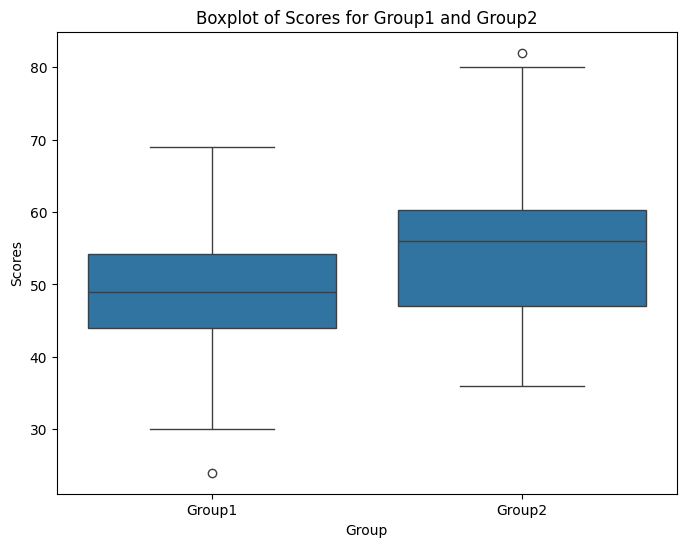

In [16]:
# Assuming your DataFrame is named 'df10'
# Selecting the 'Scores' for each group
scores_group1 = df[df['Group'] == 'Group1']['Scores']
scores_group2 = df[df['Group'] == 'Group2']['Scores']

# Performing the Mann-Whitney U test
statistic, p_value = mannwhitneyu(scores_group1, scores_group2)

# Displaying the Mann-Whitney U test results with formatted p-value
print(f'Mann-Whitney U Test:\nStatistic={statistic}\nP-value={p_value:.4f}')

# Visualization using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Scores', data=df)
plt.title('Boxplot of Scores for Group1 and Group2')
plt.show()

*Chi-square test*

In [17]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/KenDaupsey/Two-Sample-Tests-in-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
print(df.head())

    id  female   race     ses  schtyp      prog  read  write  math  science  \
0   70    male  white     low  public   general    57     52    41       47   
1  121  female  white  middle  public  vocation    68     59    53       63   
2   86    male  white    high  public   general    44     33    54       58   
3  141    male  white    high  public  vocation    63     44    47       53   
4  172    male  white  middle  public  academic    47     52    57       53   

   socst  
0     57  
1     61  
2     31  
3     56  
4     61  


Contingency Table:
race    african-amer  asian  hispanic  white  Total
female                                             
female            13      8        11     77    109
male               7      3        13     68     91
Total             20     11        24    145    200

Chi-square value: 3.2040
P-value: 0.9209


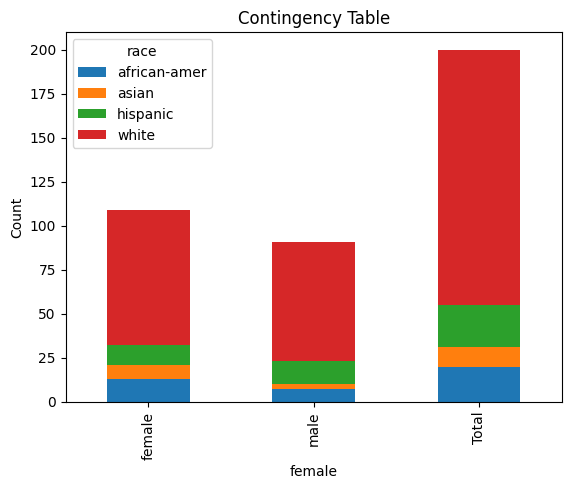

In [19]:
### The Chi Square Procedure

import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Create a contingency table with row and column totals
contingency_table = pd.crosstab(df['female'], df['race'], margins=True, margins_name='Total')

# Display the contingency table with totals
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"\nChi-square value: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

# Create a bar plot to visualize the contingency table
contingency_table.drop('Total', axis=1, inplace=True)  # Remove the 'Total' column for plotting
contingency_table.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('Contingency Table')
plt.show()

*Fisher's exact test*

In [20]:
#Firstly, let’s create a copy of the dataset df for this procedure:
df5= df.copy()

In [21]:
### PROCEDURE TO REDUCE "ses" (Socioeconomic Status) to 2 CATEGORIES
### GOOD PRACTICE FOR DATA MANIPULATION (ENGINEERING)!
import pandas as pd
from scipy.stats import fisher_exact

# Assuming 'prog' and 'ses' are the variables of interest
df5['ses_collapsed'] = df5['ses'].replace({'low': 'low_middle', 'middle': 'low_middle'})
df5.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst,ses_collapsed
0,70,male,white,low,public,general,57,52,41,47,57,low_middle
1,121,female,white,middle,public,vocation,68,59,53,63,61,low_middle
2,86,male,white,high,public,general,44,33,54,58,31,high
3,141,male,white,high,public,vocation,63,44,47,53,56,high
4,172,male,white,middle,public,academic,47,52,57,53,61,low_middle


In [22]:
### Examining newly created variable
df5['ses_collapsed'].value_counts()

low_middle    142
high           58
Name: ses_collapsed, dtype: int64

In [23]:
### Create contingency table
contingency_table = pd.crosstab(df['female'], df5['ses_collapsed'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
ses_collapsed  high  low_middle
female                         
female           29          80
male             29          62


In [24]:
# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Display the results
print(f"\nOdds Ratio: {odds_ratio:.4f}")
print(f"P-value: {p_value:.4f}")


Odds Ratio: 0.7750
P-value: 0.4373
